/tmp/ipykernel_83913/3609127840.py:163: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_83913/3609127840.py:163: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_83913/3609127840.py:163: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_83913/3609127840.py:163: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_83913/3609127840.py:163: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_83913/3609127840.py:163: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_83913/3609127840.py:163: UserWarning: Glyph 20998 (\N{CJK UNIFIED I

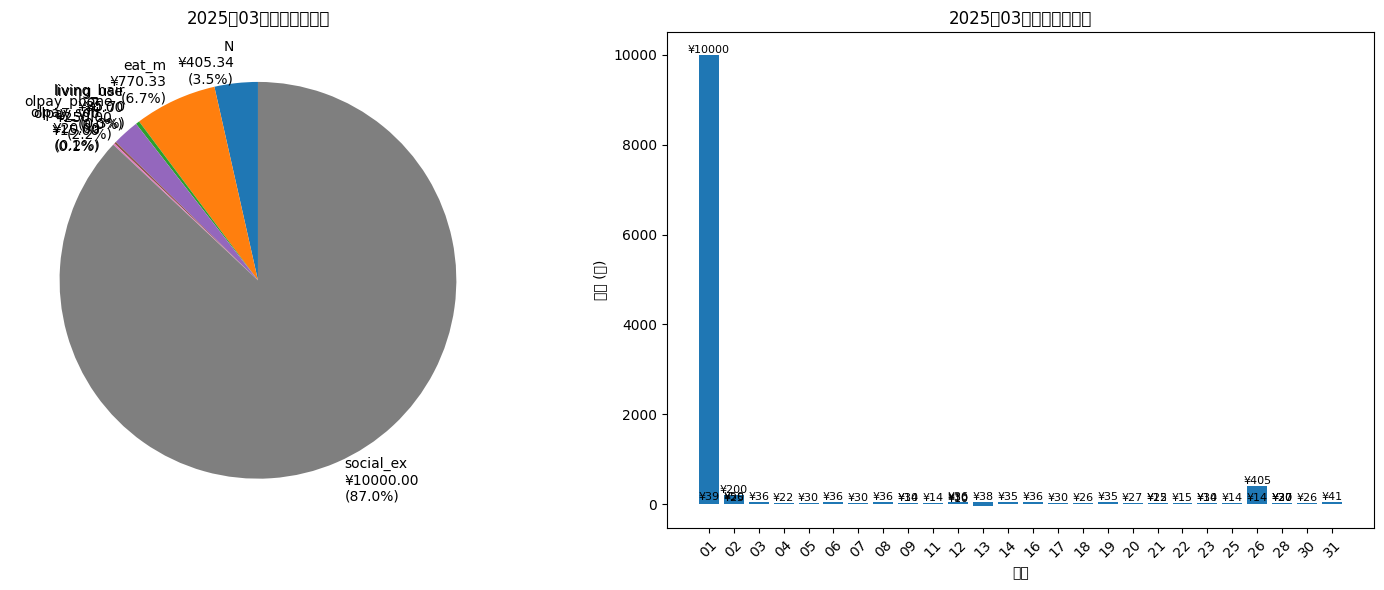


统计信息:
总消费: ¥11496.37
平均每日消费: ¥302.54

按标签统计:
            pay_money      
                  sum count
pay_tag                    
N              405.34     1
eat_m          770.33    29
living_hair     35.70     1
living_use       0.00     2
olpay_phone    250.00     2
olpay_soft      20.00     1
olpay_vip       15.00     1
social_ex    10000.00     1


In [13]:
# 输入 月份 绘制图表
# 总花费 - 已经在表格完成

params = {
    "monthyear": "202501"
}

# 饼状图 占比

# 日花费 曲线

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import calendar
import matplotlib as mpl

def get_month_date_range(monthyear):
    """获取指定月份的起止日期"""
    year = int(monthyear[:4])
    month = int(monthyear[4:])
    _, last_day = calendar.monthrange(year, month)
    start_date = f"{year}-{month:02d}-01"
    end_date = f"{year}-{month:02d}-{last_day}"
    return start_date, end_date

def query_monthly_data(cursor, params):
    """查询月度数据"""
    try:
        table_name = f"pay_{params['monthyear']}"
        
        # 检查表是否存在
        cursor.execute("""
            SELECT name FROM sqlite_master 
            WHERE type='table' AND name=?
        """, (table_name,))
        
        if not cursor.fetchone():
            return False, f"表格 {table_name} 不存在"
        
        # 查询所有数据
        query = f"SELECT pay_time, pay_money, pay_tag FROM {table_name}"
        cursor.execute(query)
        
        # 转换为DataFrame
        df = pd.DataFrame(cursor.fetchall(), columns=['pay_time', 'pay_money', 'pay_tag'])
        
        # 处理日期格式 - 使用更强大的日期解析
        df['pay_time'] = pd.to_datetime(df['pay_time'], errors='coerce', format='mixed')
        
        # 处理可能的NaT值
        df = df.dropna(subset=['pay_time'])
        
        return True, df
        
    except sqlite3.Error as e:
        return False, f"数据库错误: {str(e)}"

def plot_monthly_charts(df, monthyear):
    """绘制月度图表"""
    # 设置通用字体，避免使用特定的中文字体
    plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans', 'sans-serif']
    plt.rcParams['axes.unicode_minus'] = False
    
    # 创建一个图形，包含两个子图
    fig = plt.figure(figsize=(15, 6))
    
    # 1. 饼图 - 按标签统计
    plt.subplot(121)
    
    # 计算每个标签的总金额
    tag_sum = df.groupby('pay_tag')['pay_money'].sum()
    
    # 对标签进行排序，确保相似标签相邻
    sorted_tags = sorted(tag_sum.index)
    tag_sum = tag_sum[sorted_tags]
    
    # 计算百分比
    total = tag_sum.sum()
    percentages = tag_sum / total * 100
    
    # 生成标签文本
    labels = [f'{tag}\n¥{amount:.2f}\n({percent:.1f}%)' 
              for tag, amount, percent in zip(tag_sum.index, tag_sum, percentages)]
    
    # 绘制饼图
    plt.pie(tag_sum, labels=labels, autopct='', startangle=90)
    plt.title(f'{monthyear[:4]}年{monthyear[4:]}月消费类别分布')
    
    # 2. 柱状图 - 按日期统计
    plt.subplot(122)
    
    # 生成完整的日期范围
    start_date, end_date = get_month_date_range(monthyear)
    date_range = pd.date_range(start=start_date, end=end_date)
    
    # 按日期分组求和
    daily_sum = df.groupby('pay_time')['pay_money'].sum()
    
    # 创建完整的日期序列，填充缺失值为0
    daily_sum_full = pd.Series(0, index=date_range)
    daily_sum_full.update(daily_sum)
    
    # 绘制柱状图
    # plt.bar(daily_sum.index.strftime('%d'), daily_sum.values)
    # plt.title(f'{monthyear[:4]}年{monthyear[4:]}月每日消费金额')
    # plt.xlabel('日期')
    # plt.ylabel('金额 (元)')
    # plt.xticks(rotation=45)

    # 绘制柱状图
    ax = plt.subplot(122)
    bars = ax.bar(daily_sum.index.strftime('%d'), daily_sum.values)
    
    # 在每个柱子上方显示金额
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # 只有当金额大于0时才显示标签
            ax.text(
                bar.get_x() + bar.get_width()/2., 
                height + 0.1,               # 稍微在柱子上方
                f'¥{height:.0f}',           # 显示金额，取整数
                ha='center',                # 水平居中对齐
                va='bottom',                # 垂直底部对齐
                fontsize=8                  # 字体大小适当调小
            )
    
    plt.title(f'{monthyear[:4]}年{monthyear[4:]}月每日消费金额')
    plt.xlabel('日期')
    plt.ylabel('金额 (元)')
    plt.xticks(rotation=45)


    # # gpto4 ========================
    # # 创建 DataFrame
    # # df = pd.DataFrame(results)

    # # 清理 pay_time 列并将其格式化为日期
    # df['pay_time'] = pd.to_datetime(df['pay_time'], errors='coerce').dt.date

    # # 如果有无效日期，提前处理
    # if df['pay_time'].isnull().any():
    #     print(f"警告: 有 {df['pay_time'].isnull().sum()} 个无效日期已被排除。")

    # # 过滤掉无日期的行
    # # df.dropna(subset=['pay_time'], inplace=True)

    # # 计算每日消费金额
    # daily_spending = df.groupby('pay_time', as_index=False)['pay_money'].sum()

    # # 绘制每日消费金额柱状图
    # plt.figure(figsize=(10, 6))
    # plt.bar(daily_spending['pay_time'], daily_spending['pay_money'], color='skyblue')
    # plt.title('每日消费金额')
    # plt.xlabel('日期')
    # plt.ylabel('消费金额 (¥)')
    # plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.show()
    
    # 自动调整布局
    plt.tight_layout()
    
    return fig

def main():
    # 连接数据库
    conn = sqlite3.connect('moneycount.db')
    cursor = conn.cursor()
    
    # 查询参数
    params = {
        "monthyear": "202503"
    }
    
    try:
        # 查询数据
        success, result = query_monthly_data(cursor, params)
        
        if success:
            # 绘制图表
            fig = plot_monthly_charts(result, params['monthyear'])
            
            # 显示图表
            plt.show()
            
            # 输出统计信息
            print("\n统计信息:")
            print(f"总消费: ¥{result['pay_money'].sum():.2f}")
            print(f"平均每日消费: ¥{result['pay_money'].sum() / len(result['pay_money']):.2f}")
            print("\n按标签统计:")
            tag_stats = result.groupby('pay_tag').agg({
                'pay_money': ['sum', 'count']
            })
            print(tag_stats)
            
        else:
            print(f"错误: {result}")
            
    except Exception as e:
        print(f"错误: {str(e)}")
        
    finally:
        conn.close()

if __name__ == "__main__":
    main()


# 预算额度，线条